In [1]:
conda install scikit-learn pandas matplotlib


Jupyter detected...
3 channel Terms of Service accepted
Retrieving notices: done
Channels:
 - defaults
Platform: win-64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn pandas matplotlib


Note: you may need to restart the kernel to use updated packages.


✅ Dataset loaded successfully
Shape: (20640, 9)
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

📊 Model Evaluation (Simple Linear Regression):
Mean Absolute Error (MAE): 0.629908653009376
Mean Squared Error (MSE): 0.7091157771765548
R² Score: 0.45885918903846656


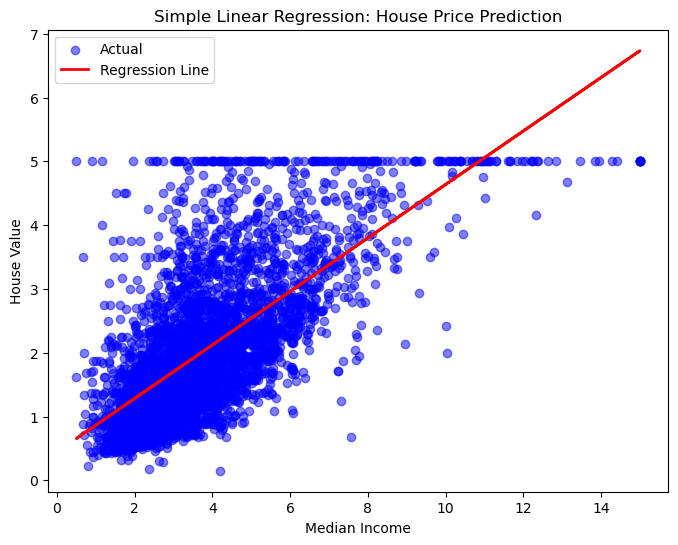


Intercept (b0): 0.4445972916907872
Coefficient (b1): 0.4193384939381273
Interpretation: For every unit increase in Median Income, House Value increases by 0.42

Running Multiple Linear Regression with all features...

📊 Model Evaluation (Multiple Linear Regression):
Mean Absolute Error (MAE): 0.5332001304956557
Mean Squared Error (MSE): 0.5558915986952442
R² Score: 0.575787706032451

Intercept: -37.02327770606402
Coefficients for each feature:
MedInc: 0.4487
HouseAge: 0.0097
AveRooms: -0.1233
AveBedrms: 0.7831
Population: -0.0000
AveOccup: -0.0035
Latitude: -0.4198
Longitude: -0.4337


In [ ]:
# Task 3: Linear Regression
# Objective: Implement and understand simple & multiple linear regression
# Tools: Scikit-learn, Pandas, Matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ----------------------------------------------------
# 1. Import and preprocess the dataset
# ----------------------------------------------------
housing = fetch_california_housing(as_frame=True)  # load dataset
df = housing.frame   # convert to pandas DataFrame

print("✅ Dataset loaded successfully")
print("Shape:", df.shape)
print(df.head())

# ----------------------------------------------------
# 2. Define Features (X) and Target (y)
# ----------------------------------------------------


X_simple = df[['MedInc']]
y = df['MedHouseVal']

# --- MULTIPLE Linear Regression (all features)
X_multi = df.drop(columns='MedHouseVal')

# ----------------------------------------------------
# 3. Train-Test Split
# ----------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)

# ----------------------------------------------------
# 4. Train Linear Regression Model
# ----------------------------------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# ----------------------------------------------------
# 5. Predictions & Evaluation
# ----------------------------------------------------
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n📊 Model Evaluation (Simple Linear Regression):")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

# ----------------------------------------------------
# 6. Plot Regression Line
# ----------------------------------------------------
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color="blue", alpha=0.5, label="Actual")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Regression Line")
plt.xlabel("Median Income")
plt.ylabel("House Value")
plt.title("Simple Linear Regression: House Price Prediction")
plt.legend()
plt.show()

# ----------------------------------------------------
# 7. Interpret Coefficients
# ----------------------------------------------------
print("\nIntercept (b0):", model.intercept_)
print("Coefficient (b1):", model.coef_[0])
print(f"Interpretation: For every unit increase in Median Income, House Value increases by {model.coef_[0]:.2f}")

# ----------------------------------------------------
# 8. Multiple Linear Regression Example
# ----------------------------------------------------
print("\nRunning Multiple Linear Regression with all features...")

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y, test_size=0.2, random_state=42)

multi_model = LinearRegression()
multi_model.fit(X_train_m, y_train_m)

y_pred_m = multi_model.predict(X_test_m)

mae_m = mean_absolute_error(y_test_m, y_pred_m)
mse_m = mean_squared_error(y_test_m, y_pred_m)
r2_m = r2_score(y_test_m, y_pred_m)

print("\n📊 Model Evaluation (Multiple Linear Regression):")
print("Mean Absolute Error (MAE):", mae_m)
print("Mean Squared Error (MSE):", mse_m)
print("R² Score:", r2_m)

print("\nIntercept:", multi_model.intercept_)
print("Coefficients for each feature:")
for feature, coef in zip(X_multi.columns, multi_model.coef_):
    print(f"{feature}: {coef:.4f}")
